In [98]:
import pandas

# Return 5 arbitrary diseases
query = '''
MATCH (s)-[r]->(t)
RETURN toString(id(s)) as source, type(r) as type, toString(id(t)) AS target
'''

In [94]:
id_noeud["id"]=id_noeud.index

In [99]:
# # Uses py2neo. See http://py2neo.org/v3/
import py2neo
graph = py2neo.Graph("bolt://neo4j.het.io")
cursor = graph.run(query)
result_df = pandas.DataFrame.from_records(cursor, columns=cursor.keys())
result_df

,source,type,target
0,19018,EXPRESSES_AeG,0
1,13609,EXPRESSES_AeG,0
2,45217,EXPRESSES_AeG,0
3,2281,EXPRESSES_AeG,0
4,15219,EXPRESSES_AeG,0
...,...,...,...
2250192,11778,PARTICIPATES_GpBP,47030
2250193,28731,PARTICIPATES_GpBP,47030
2250194,35170,PARTICIPATES_GpBP,47030
2250195,7101,PARTICIPATES_GpBP,47030


In [96]:
id_noeud['id'] = id_noeud['id'].apply(lambda x: x-1)

In [97]:
id_noeud['id'] = id_noeud['id'].astype(str)
id_noeud

,source,metaedge,id
1,Anatomy::UBERON:0000002,uterine cervix,0
2,Anatomy::UBERON:0000004,nose,1
3,Anatomy::UBERON:0000006,islet of Langerhans,2
4,Anatomy::UBERON:0000007,pituitary gland,3
5,Anatomy::UBERON:0000010,peripheral nervous system,4
...,...,...,...
47027,Symptom::D064250,Hypertriglyceridemic Waist,47026
47028,Symptom::D065634,Cerebrospinal Fluid Leak,47027
47029,Symptom::D065635,Benign Paroxysmal Positional Vertigo,47028
47030,Symptom::D065906,Hyperlactatemia,47029


In [100]:
result_df = result_df.merge(id_noeud, left_on='source', right_on='id', how='left')
result_df

,source_x,type,target,source_y,metaedge,id
0,19018,EXPRESSES_AeG,0,Gene::140873,C20orf173,19018
1,13609,EXPRESSES_AeG,0,Compound::DB00569,Fondaparinux sodium,13609
2,45217,EXPRESSES_AeG,0,Side Effect::C0853330,Peripheral neuropathy aggravated,45217
3,2281,EXPRESSES_AeG,0,Biological Process::GO:0008406,gonad development,2281
4,15219,EXPRESSES_AeG,0,Gene::100288413,ERVMER34-1,15219
...,...,...,...,...,...,...
2250192,11778,PARTICIPATES_GpBP,47030,Biological Process::GO:2001295,malonyl-CoA biosynthetic process,11778
2250193,28731,PARTICIPATES_GpBP,47030,Gene::55972,SLC25A40,28731
2250194,35170,PARTICIPATES_GpBP,47030,Gene::93621,MRFAP1,35170
2250195,7101,PARTICIPATES_GpBP,47030,Biological Process::GO:0048296,regulation of isotype switching to IgA isotypes,7101


In [102]:
result_df = result_df.drop(columns=['source_x','source_y','id'])
result_df

,type,target,metaedge
0,EXPRESSES_AeG,0,C20orf173
1,EXPRESSES_AeG,0,Fondaparinux sodium
2,EXPRESSES_AeG,0,Peripheral neuropathy aggravated
3,EXPRESSES_AeG,0,gonad development
4,EXPRESSES_AeG,0,ERVMER34-1
...,...,...,...
2250192,PARTICIPATES_GpBP,47030,malonyl-CoA biosynthetic process
2250193,PARTICIPATES_GpBP,47030,SLC25A40
2250194,PARTICIPATES_GpBP,47030,MRFAP1
2250195,PARTICIPATES_GpBP,47030,regulation of isotype switching to IgA isotypes


In [103]:
result_df['type'] = result_df['type'].apply(lambda x: x.split("_")[0].lower())
result_df

,type,target,metaedge
0,expresses,0,C20orf173
1,expresses,0,Fondaparinux sodium
2,expresses,0,Peripheral neuropathy aggravated
3,expresses,0,gonad development
4,expresses,0,ERVMER34-1
...,...,...,...
2250192,participates,47030,malonyl-CoA biosynthetic process
2250193,participates,47030,SLC25A40
2250194,participates,47030,MRFAP1
2250195,participates,47030,regulation of isotype switching to IgA isotypes


In [105]:
result_df["relation"]=result_df["type"]
result_df

,type,target,metaedge,relation
0,expresses,0,C20orf173,expresses
1,expresses,0,Fondaparinux sodium,expresses
2,expresses,0,Peripheral neuropathy aggravated,expresses
3,expresses,0,gonad development,expresses
4,expresses,0,ERVMER34-1,expresses
...,...,...,...,...
2250192,participates,47030,malonyl-CoA biosynthetic process,participates
2250193,participates,47030,SLC25A40,participates
2250194,participates,47030,MRFAP1,participates
2250195,participates,47030,regulation of isotype switching to IgA isotypes,participates


In [106]:
result_df = result_df.merge(id_noeud, left_on='target', right_on='id', how='left')
result_df

,type,target,metaedge_x,relation,source,metaedge_y,id
0,expresses,0,C20orf173,expresses,Anatomy::UBERON:0000002,uterine cervix,0
1,expresses,0,Fondaparinux sodium,expresses,Anatomy::UBERON:0000002,uterine cervix,0
2,expresses,0,Peripheral neuropathy aggravated,expresses,Anatomy::UBERON:0000002,uterine cervix,0
3,expresses,0,gonad development,expresses,Anatomy::UBERON:0000002,uterine cervix,0
4,expresses,0,ERVMER34-1,expresses,Anatomy::UBERON:0000002,uterine cervix,0
...,...,...,...,...,...,...,...
2250192,participates,47030,malonyl-CoA biosynthetic process,participates,Symptom::D066190,Allesthesia,47030
2250193,participates,47030,SLC25A40,participates,Symptom::D066190,Allesthesia,47030
2250194,participates,47030,MRFAP1,participates,Symptom::D066190,Allesthesia,47030
2250195,participates,47030,regulation of isotype switching to IgA isotypes,participates,Symptom::D066190,Allesthesia,47030


In [107]:
result_df = result_df.drop(columns=['type','target','source','id'])
result_df

,metaedge_x,relation,metaedge_y
0,C20orf173,expresses,uterine cervix
1,Fondaparinux sodium,expresses,uterine cervix
2,Peripheral neuropathy aggravated,expresses,uterine cervix
3,gonad development,expresses,uterine cervix
4,ERVMER34-1,expresses,uterine cervix
...,...,...,...
2250192,malonyl-CoA biosynthetic process,participates,Allesthesia
2250193,SLC25A40,participates,Allesthesia
2250194,MRFAP1,participates,Allesthesia
2250195,regulation of isotype switching to IgA isotypes,participates,Allesthesia


In [2]:
hetionet = pd.read_csv("hetionet.csv",encoding='latin-1')
hetionet

,Unnamed: 0,metaedge_x,relation,metaedge_y
0,0,C20orf173,expresses,uterine cervix
1,1,Fondaparinux sodium,expresses,uterine cervix
2,2,Peripheral neuropathy aggravated,expresses,uterine cervix
3,3,gonad development,expresses,uterine cervix
4,4,ERVMER34-1,expresses,uterine cervix
...,...,...,...,...
2250192,2250192,malonyl-CoA biosynthetic process,participates,Allesthesia
2250193,2250193,SLC25A40,participates,Allesthesia
2250194,2250194,MRFAP1,participates,Allesthesia
2250195,2250195,regulation of isotype switching to IgA isotypes,participates,Allesthesia


In [3]:
hetionet = hetionet.drop(columns=["Unnamed: 0"])

In [111]:
kg_df = pd.read_csv("triplets.csv",encoding='latin-1')
kg_df

,source,edge,target
0,lower that,resulted in,PCD cells
1,higher strabismus amblyopia results,were similar,small LR
2,seven follow up infants,continue,sun
3,age,reanalyzed,scoring outcome scoring outcome '
4,print materials print materials who,was,previous year
...,...,...,...
995,Extreme types,required,median Aborigines
996,other structures,missed,falsely testis
997,nephrotoxicity Receiver,revealed high,Cmin vancomycin
998,PRP group PRP group difference,was,PRP group PRP group group


In [124]:
pip install --update networkx

Note: you may need to restart the kernel to use updated packages.



Usage:   
  C:\Users\Mohcine\anaconda3\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  C:\Users\Mohcine\anaconda3\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  C:\Users\Mohcine\anaconda3\python.exe -m pip install [options] [-e] <vcs project url> ...
  C:\Users\Mohcine\anaconda3\python.exe -m pip install [options] [-e] <local project path> ...
  C:\Users\Mohcine\anaconda3\python.exe -m pip install [options] <archive url/path> ...

no such option: --update


In [4]:
G=nx.from_pandas_edgelist(kg_df, "source", "target", edge_attr=True, create_using=nx.MultiDiGraph())
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx(G, pos=pos)
plt.show()

In [ ]:
plt.figure(figsize=(12,12))
pos = nx.spring_layout(G)
#nx.draw(G, with_labels=True, node_color='skyblue', edge_cmap=plt.cm.Blues, pos = pos)
nx.draw_networkx(G, pos=pos)
plt.show()

In [5]:
import pickle
with open('Graph_hetionet_pkl','wb') as f:
     pickle.dump(G,f)

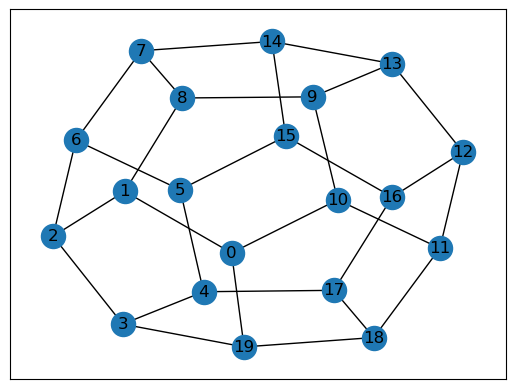

In [135]:
from networkx import *
import matplotlib.pyplot as plt
import networkx as nx
G1=nx.dodecahedral_graph()
nx.draw_networkx(G1)  # networkx draw()
plt.draw()  # pyplot draw()